In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\kumar\Downloads\HR-Analytics (DA)\train.csv")
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
df['previous_year_rating'].value_counts().sum()

np.int64(50684)

In [3]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [4]:
df.shape

(54808, 14)

In [5]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [6]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [7]:
df['education'].value_counts()

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

In [8]:
df['previous_year_rating'].value_counts()

previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: count, dtype: int64

In [9]:
education_na = df[df['education'].isnull()]
education_na.shape[0]

2409

In [10]:
per = round((education_na.shape[0] / df.shape[0])*100,2)
per

4.4

In [11]:
a = df['education'].mode()[0]
a

"Bachelor's"

In [12]:
df['education'].fillna(a,inplace=True)

In [13]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [14]:
rating_mean = df['previous_year_rating'].mean()
rating_median = df['previous_year_rating'].median()
print(rating_mean)
print(rating_median)

3.329255780917055
3.0


In [15]:
df['previous_year_rating'].fillna(rating_median, inplace=True)

In [16]:
df.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [16]:
df.to_csv('cleaned.csv', index=False)

In [ ]:
# Visualization: 

In [17]:
counts=df['department'].value_counts()
counts

department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64

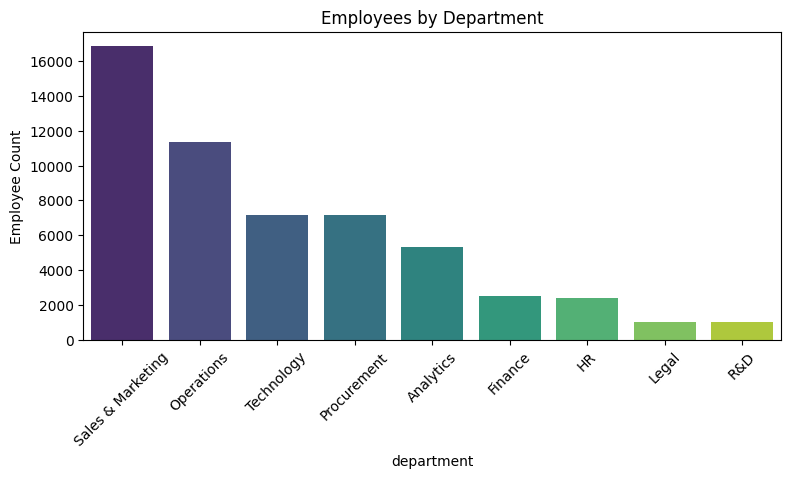

In [56]:
plt.figure(figsize=(9,4))
sns.barplot(x=counts.index, y=counts.values,palette='viridis')
plt.title("Employees by Department")
plt.ylabel("Employee Count")
plt.xticks(rotation=45)
plt.savefig(r"C:\Users\kumar\Downloads\depart.png")
plt.show()

In [27]:
promoted = df['is_promoted'].value_counts()
promoted

is_promoted
0    50140
1     4668
Name: count, dtype: int64

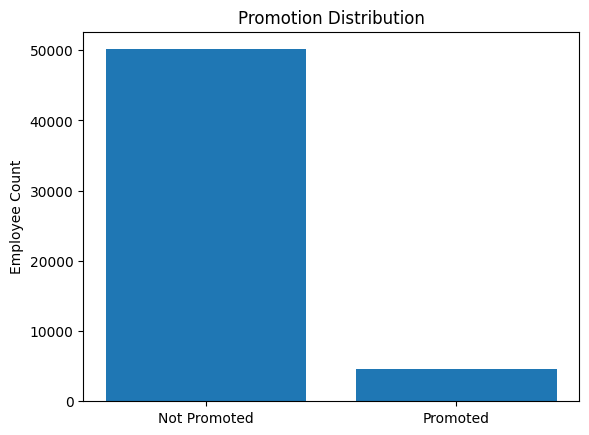

In [58]:
plt.figure()
plt.bar(promoted.index,promoted.values)
plt.title("Promotion Distribution")
plt.ylabel("Employee Count")
plt.xticks([0,1], ['Not Promoted', 'Promoted'])
plt.savefig(r"C:\Users\kumar\Downloads\promo.png")
plt.show()

In [ ]:
# Promotion Rate by KPI Completion

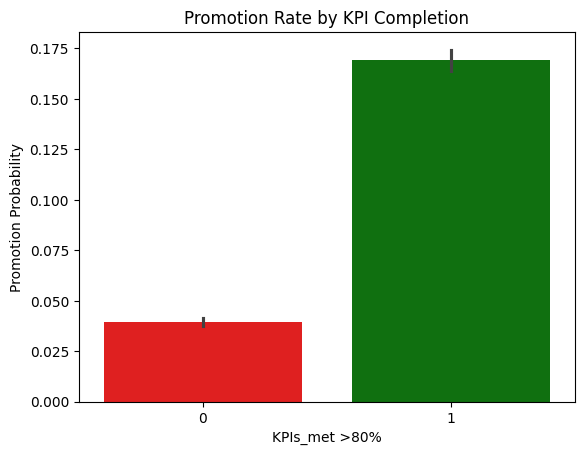

In [61]:
col=['red','green']
sns.barplot(data=df, x='KPIs_met >80%', y='is_promoted',palette=col)
plt.title("Promotion Rate by KPI Completion")
plt.ylabel("Promotion Probability")
plt.savefig(r"C:\Users\kumar\Downloads\kpi.png")
plt.show()

In [ ]:
# Avg Training Score vs Promotion

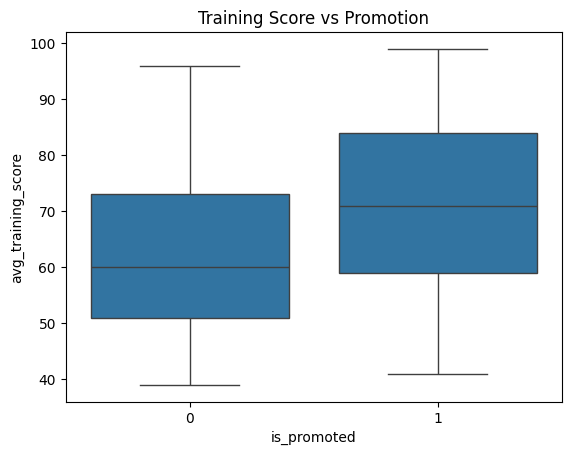

In [62]:
sns.boxplot(data=df, x='is_promoted', y='avg_training_score')
plt.title("Training Score vs Promotion")
plt.savefig(r"C:\Users\kumar\Downloads\tra.png")
plt.show()

In [34]:
# Previous Year Rating vs Promotion

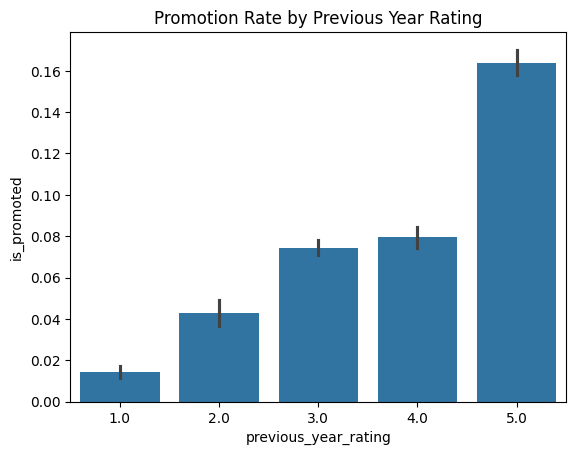

In [64]:
sns.barplot(data=df, x='previous_year_rating', y='is_promoted')
plt.title("Promotion Rate by Previous Year Rating")
plt.show()

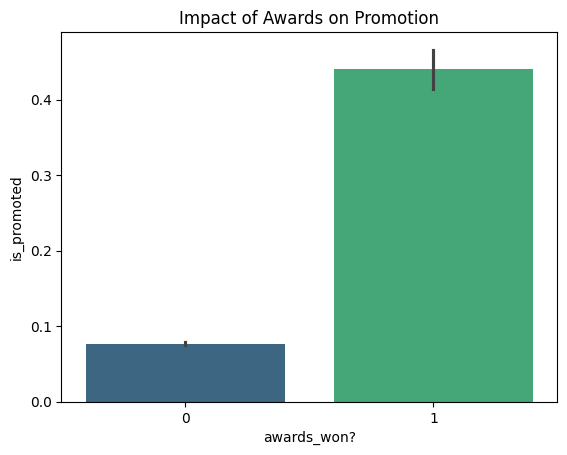

In [68]:
sns.barplot(data=df,x='awards_won?', y='is_promoted', palette='viridis')
plt.title("Impact of Awards on Promotion")
plt.savefig(r"C:\Users\kumar\Downloads\impact.png")
plt.show()

In [ ]:
#

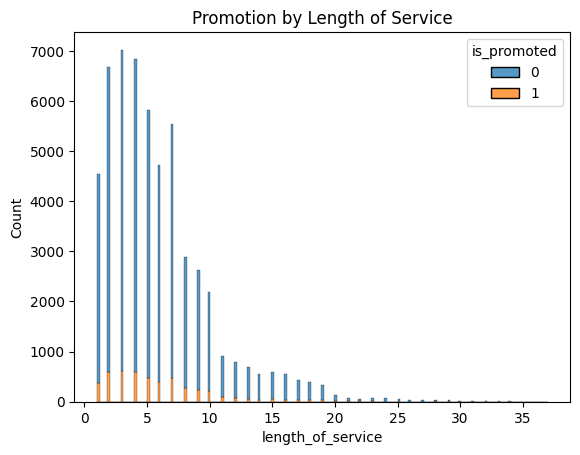

In [38]:
sns.histplot(data=df, x='length_of_service', hue='is_promoted', multiple='stack')
plt.title("Promotion by Length of Service")
plt.show()

In [48]:
# Department-wise Promotion Rate
dept_promo = df.groupby('department')['is_promoted'].mean().sort_values()
dept_promo

department
Legal                0.051011
HR                   0.056245
R&D                  0.069069
Sales & Marketing    0.072031
Finance              0.081230
Operations           0.090148
Analytics            0.095665
Procurement          0.096386
Technology           0.107593
Name: is_promoted, dtype: float64

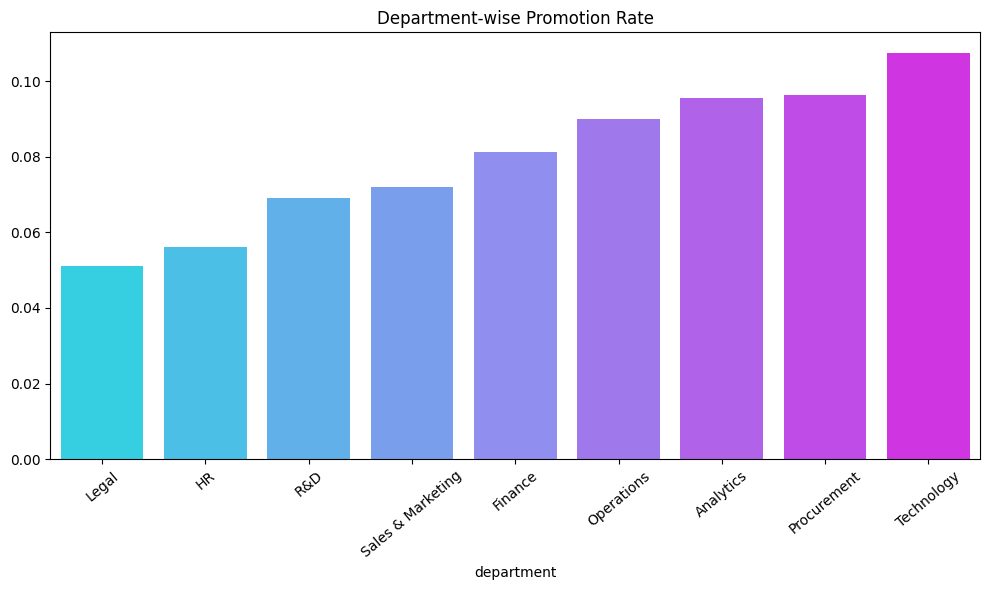

In [72]:
plt.figure(figsize=(10,6))
sns.barplot(x=dept_promo.index, y=dept_promo.values,palette='cool')
plt.title("Department-wise Promotion Rate")
plt.xticks(rotation=40)
plt.tight_layout()
plt.savefig(r"C:\Users\kumar\Downloads\dept_promo.png")
plt.show()

In [69]:
# Gender :
gender_counts = df['gender'].value_counts()
gender_counts

gender
m    38496
f    16312
Name: count, dtype: int64

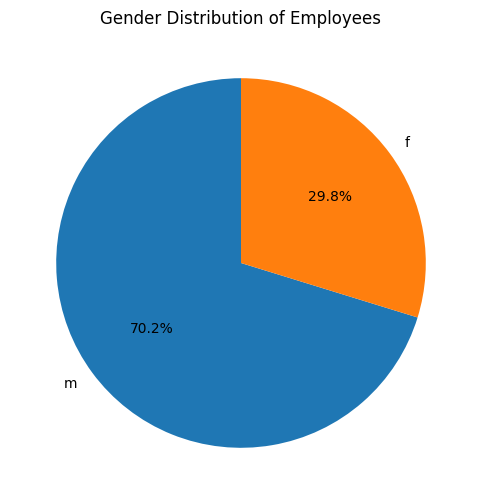

In [70]:
plt.figure(figsize=(6,6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Gender Distribution of Employees")
plt.show()

In [ ]:
# Distribution of Recruitment Channel

In [9]:
df['recruitment_channel'].value_counts(normalize=True)*100

recruitment_channel
other       55.550285
sourcing    42.366078
referred     2.083637
Name: proportion, dtype: float64

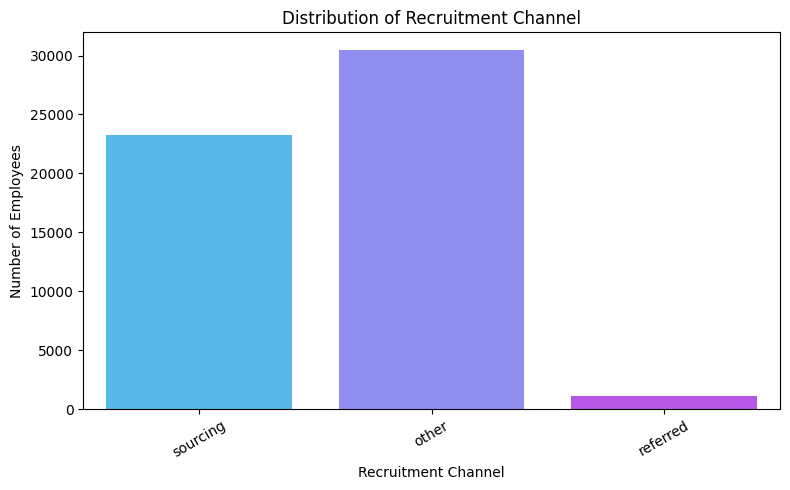

In [75]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='recruitment_channel',palette='cool')
plt.title("Distribution of Recruitment Channel")
plt.xlabel("Recruitment Channel")
plt.ylabel("Number of Employees")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig(r"C:\Users\kumar\Downloads\recru.png")
plt.show()

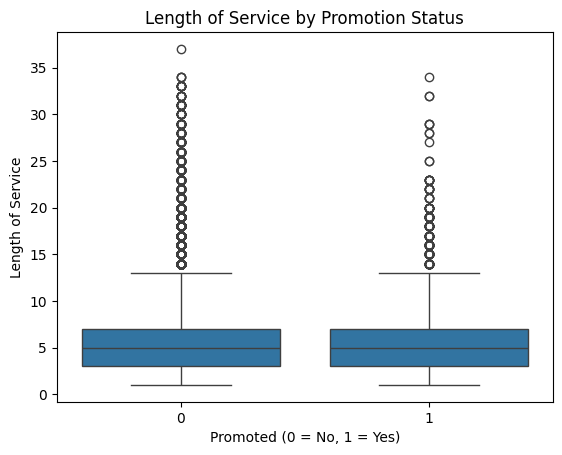

In [6]:
sns.boxplot(data=df, x='is_promoted', y='length_of_service')
plt.title("Length of Service by Promotion Status")
plt.xlabel("Promoted (0 = No, 1 = Yes)")
plt.ylabel("Length of Service")
plt.show()

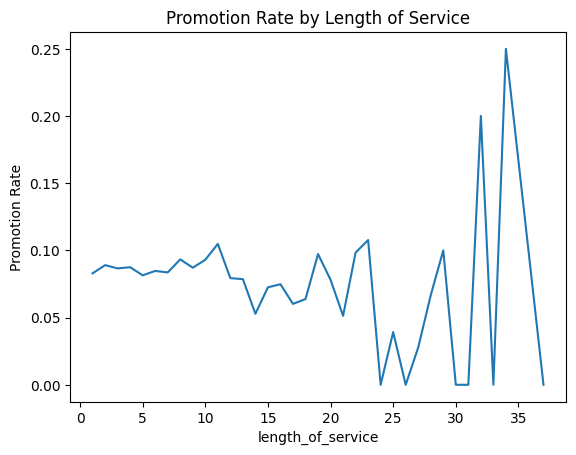

In [3]:
promotion_rate = df.groupby('length_of_service')['is_promoted'].mean().reset_index()

sns.lineplot(data=promotion_rate, x='length_of_service', y='is_promoted')
plt.title("Promotion Rate by Length of Service")
plt.ylabel("Promotion Rate")
plt.show()

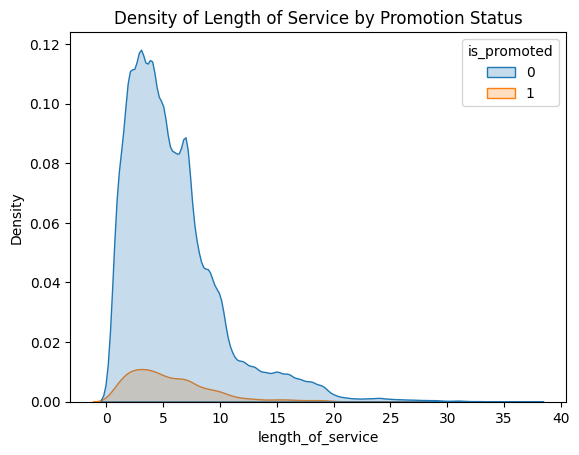

In [9]:
sns.kdeplot(data=df, x='length_of_service', hue='is_promoted', fill=True)
plt.title("Density of Length of Service by Promotion Status")
plt.savefig(r"C:\Users\kumar\Downloads\density.png")
plt.show()

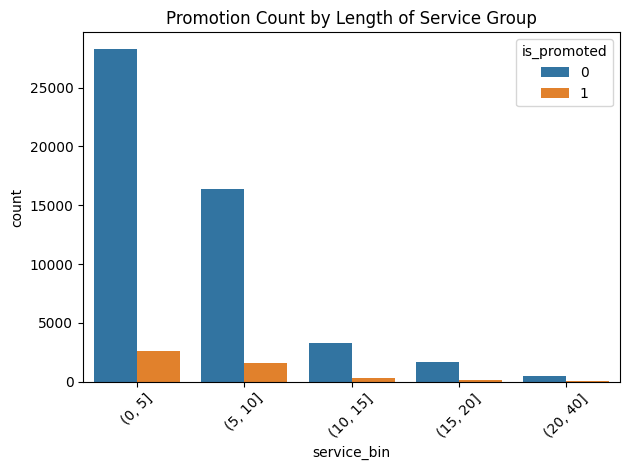

In [11]:
df['service_bin'] = pd.cut(
    df['length_of_service'],
    bins=[0,5,10,15,20,40]
)

sns.countplot(data=df, x='service_bin', hue='is_promoted')
plt.title("Promotion Count by Length of Service Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"C:\Users\kumar\Downloads\service.png")
plt.show()

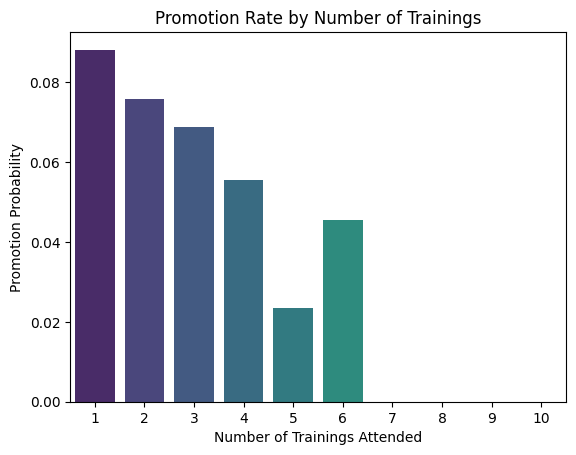

In [17]:
sns.barplot(data=df, x='no_of_trainings', y='is_promoted',errorbar=None,palette='viridis')
plt.title("Promotion Rate by Number of Trainings")
plt.ylabel("Promotion Probability")
plt.xlabel("Number of Trainings Attended")
plt.savefig(r"C:\Users\kumar\Downloads\no.png")
plt.show()

In [3]:
edu_promo = df.groupby('education')['is_promoted'].mean().reset_index()
edu_promo

,education,is_promoted
0,Bachelor's,0.082031
1,Below Secondary,0.083230
2,Master's & above,0.098559


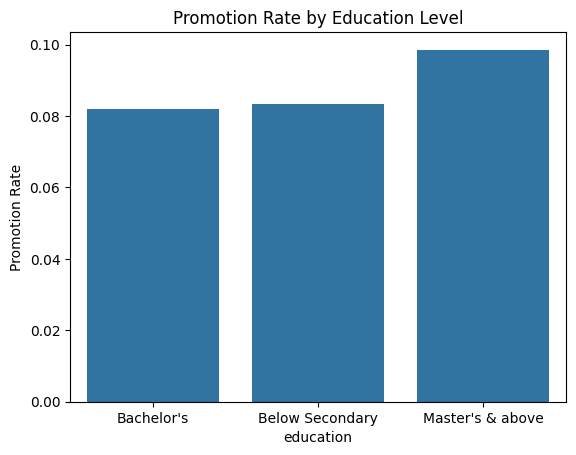

In [4]:
sns.barplot(data=edu_promo, x='education', y='is_promoted')
plt.title("Promotion Rate by Education Level")
plt.ylabel("Promotion Rate")
plt.savefig(r"C:\Users\kumar\Downloads\edu.png")
plt.show()


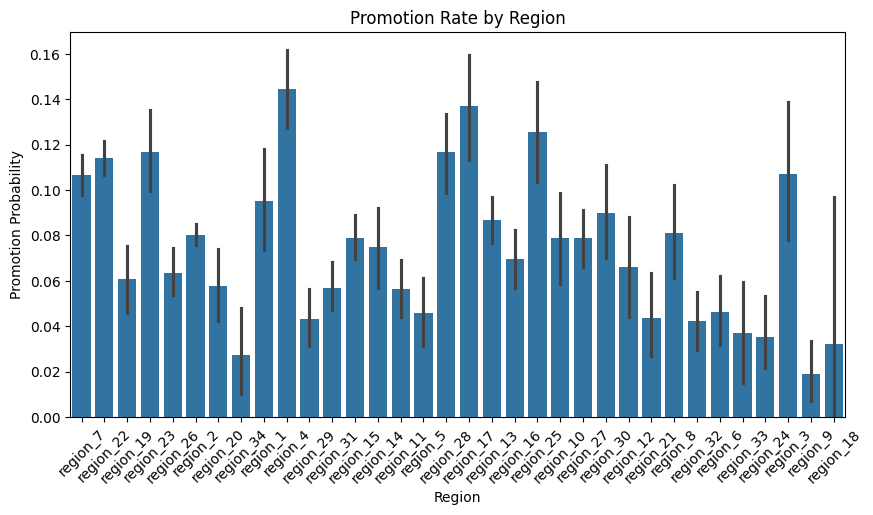

In [5]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='region', y='is_promoted')
plt.title("Promotion Rate by Region")
plt.ylabel("Promotion Probability")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()